# Linearity and Convolutions

In [57]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import cv2
from scipy.signal import correlate

from scipy.ndimage import convolve, correlate

In [113]:
i = np.arange(1,17, dtype='float').reshape(4,4)
k = np.array([
        [-1, -1,1], [-1,0,1], [-1,1,1]])

print ("Image:\n {0}\n".format(i))
print ("Kernel:\n {0}\n".format(k))

correlate = cv2.filter2D(i,-1,k)
print ("correlate:\n {0}\n".format(correlate))
assert np.sum(i[0:3,0:3]*k) == correlate[1,1]

z = cv2.flip(k,-1)
print ("Flipped Kernel:\n {0}\n".format(z))
convolve = cv2.filter2D(i,-1, z)
print ("correlate:\n {0}\n".format(convolve))
assert np.sum(i[0:3,0:3]*z) == convolve[1,1]

Image:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]

Kernel:
 [[-1 -1  1]
 [-1  0  1]
 [-1  1  1]]

correlate:
 [[ 0.  6.  6.  0.]
 [ 8. 14. 14.  8.]
 [ 8. 14. 14.  8.]
 [ 0.  6.  6.  0.]]

Flipped Kernel:
 [[ 1  1 -1]
 [ 1  0 -1]
 [ 1 -1 -1]]

correlate:
 [[  0.  -6.  -6.   0.]
 [ -8. -14. -14.  -8.]
 [ -8. -14. -14.  -8.]
 [  0.  -6.  -6.   0.]]



[[200 200 200]
 [200 255 200]
 [200 200 200]]


/Users/smujjiga/anaconda3_5/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/smujjiga/anaconda3_5/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


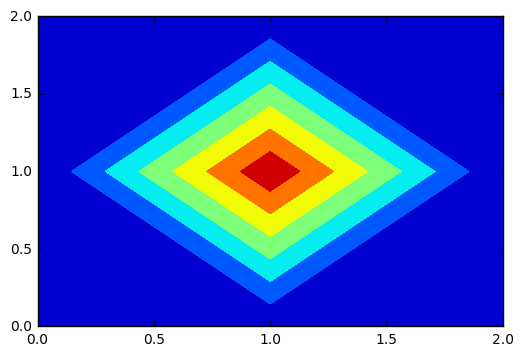

In [114]:
kernel = np.array([[200,200,200],[200,255,200],[200,200,200]])
print (kernel)
plt.contourf(np.array([[0,0,0],[1,1,1],[2,2,2]]),
             np.array([[0,1,2],[0,1,2],[0,1,2]]),
             np.array([[200,200,200],[200,255,200],[200,200,200]]))
plt.show()

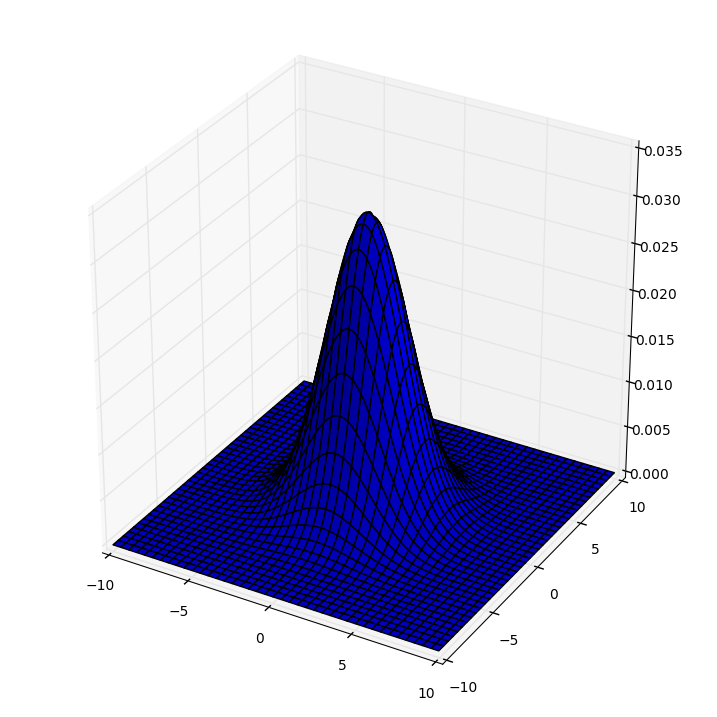

In [115]:
plt.close('all')
x, y = np.mgrid[-10:10:.05, -10:10:.05]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0,0],[[5,0],[0,5]])
#plt.contourf(x, y, rv.pdf(pos))

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,rv.pdf(pos))
plt.show()

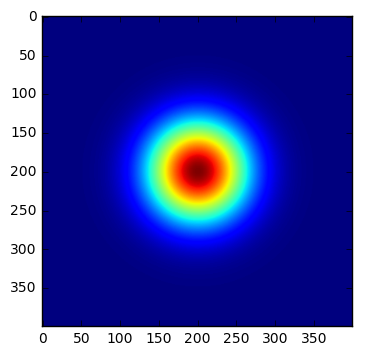

(400, 400)


In [116]:
img = rv.pdf(pos)
plt.imshow(img)
plt.show()
print (img.shape)

# Filters

[0.03183099 0.03182303 0.03182303 0.03181508]
[154 167 157 169]
[153 166 157 170]
[150 172 152 178]
[154 171 157 175]
[148 170 150 175]


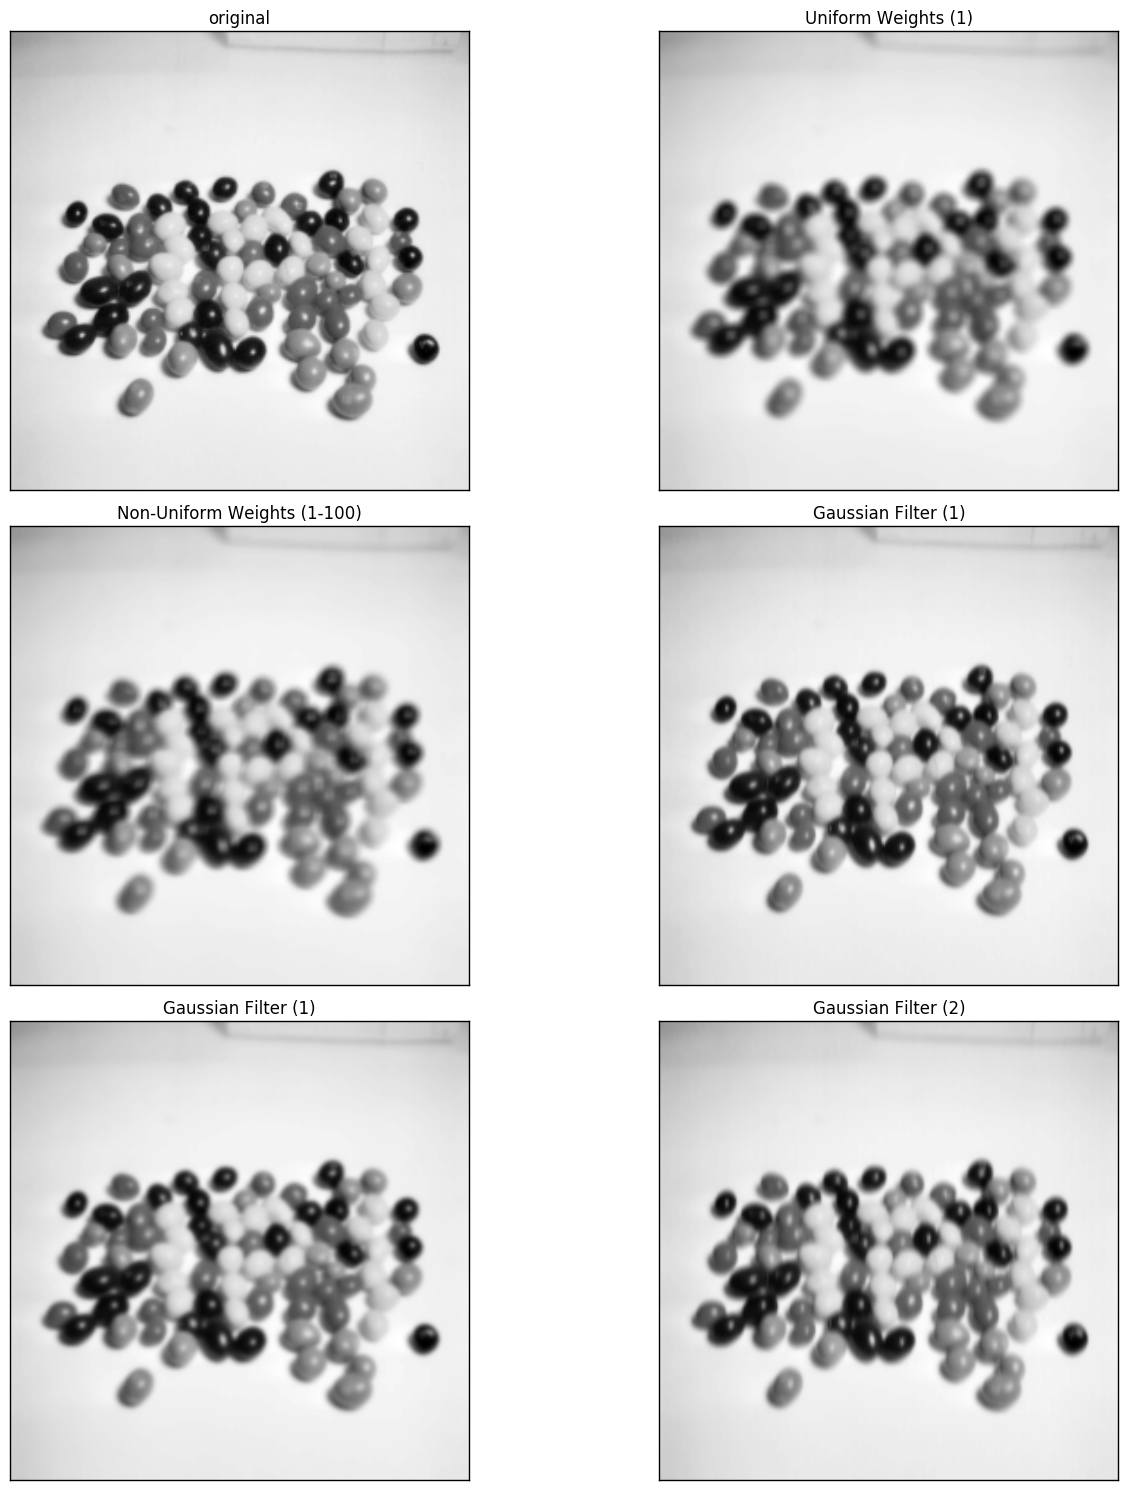

In [117]:
lena = cv2.imread("images/4.1.08.tiff",0)

plt.close('all')
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.imshow(lena, cmap='gray')
print (img[200:202,200:202].flatten())
plt.title('original'), plt.xticks([]), plt.yticks([])

# Uniform weight --- correlation filter
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(lena,-1,kernel)
print (img[200:202,200:202].flatten())
plt.subplot(3,2,2)
plt.imshow(img, cmap='gray')
plt.title('Uniform Weights (1)'), plt.xticks([]), plt.yticks([])


# Non uniform weight --- cross correlation filter
kernel = np.random.randint(1,100,(5,5))
kernel = kernel/ np.sum(kernel)
img = cv2.filter2D(lena,-1,kernel)
print (img[200:202,200:202].flatten())
plt.subplot(3,2,3)
plt.imshow(img, cmap='gray')
plt.title('Non-Uniform Weights (1-100)'), plt.xticks([]), plt.yticks([])

# Gaussian --- cross correlation filter
kernel = cv2.getGaussianKernel(5,1)
img = cv2.filter2D(lena,-1,kernel)
print (img[200:202,200:202].flatten())
plt.subplot(3,2,4)
plt.imshow(img, cmap='gray')
plt.title('Gaussian Filter (1)'), plt.xticks([]), plt.yticks([])

img = cv2.GaussianBlur(lena, (5,5), 1)
print (img[200:202,200:202].flatten())
plt.subplot(3,2,5)
plt.imshow(img, cmap='gray')
plt.title('Gaussian Filter (1)'), plt.xticks([]), plt.yticks([])

kernel = cv2.getGaussianKernel(5,2)
img = cv2.filter2D(lena,-1,kernel)
print (img[200:202,200:202].flatten())
plt.subplot(3,2,6)
plt.imshow(img, cmap='gray')
plt.title('Gaussian Filter (2)'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

## Median Filter

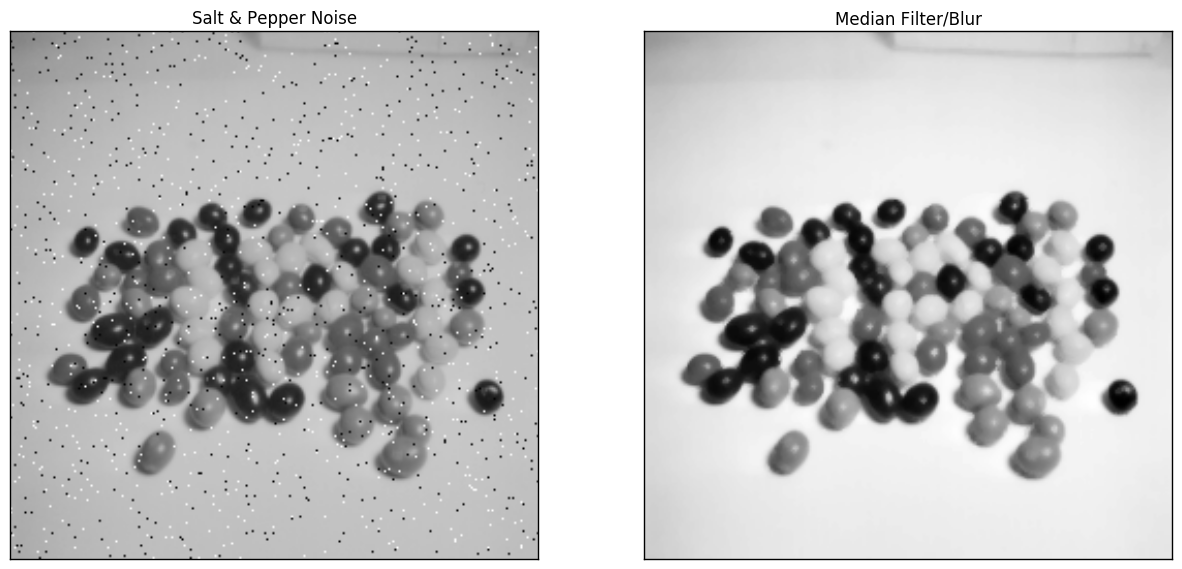

In [118]:
plt.close('all')
plt.figure(figsize=(15,15))
img = np.copy(lena)
# Add noise
noise = np.random.randint(0,100,size=img.shape)
img = np.where(noise==0,0,img)
img = np.where(noise==99,255,img)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('Salt & Pepper Noise')
img = cv2.medianBlur(img,3)
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('Median Filter/Blur')
plt.show()